# Fuzzy Logic for Mood Detection

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

### Fuzzy set definition:

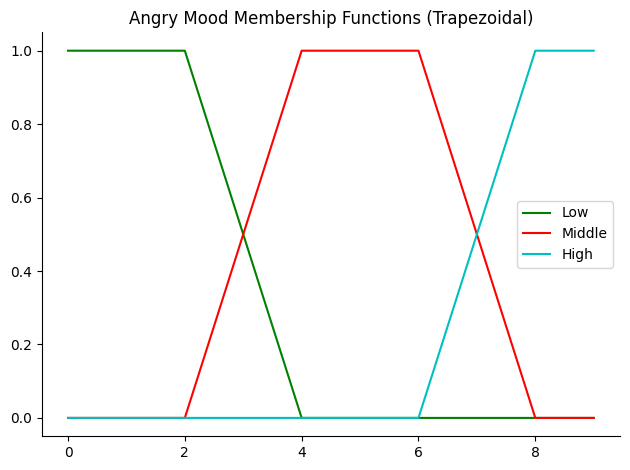

In [2]:
# Define the universe of discourse for the "Angry" mood
x_angry = np.arange(0,10,1)

# Define trapezoidal membership functions for "Angry"
angry_low = fuzz.trapmf(x_angry, [0, 0, 2, 4])
angry_middle = fuzz.trapmf(x_angry, [2, 4, 6, 8])
angry_high = fuzz.trapmf(x_angry, [6, 8, 10, 10])

# Plotting the membership functions
fig, ax = plt.subplots()

ax.plot(x_angry, angry_low, 'g', linewidth=1.5, label='Low')
ax.plot(x_angry, angry_middle, 'r', linewidth=1.5, label='Middle')
ax.plot(x_angry, angry_high, 'c', linewidth=1.5, label='High')

ax.set_title('Angry Mood Membership Functions (Trapezoidal)')
ax.legend()

# Turn off top/right axes
for ax in (ax,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

plt.show()

do the same for each mood in a loop:

In [3]:
membership_functions = []

for i in range(6):
    # Define the universe of discourse for the "Angry" mood
    x = np.arange(0,10,1)

    # Define trapezoidal membership functions for "Angry"
    low = fuzz.trapmf(x_angry, [0, 0, 2, 4])
    middle = fuzz.trapmf(x_angry, [2, 4, 6, 8])
    high = fuzz.trapmf(x_angry, [6, 8, 10, 10])

    membership_functions.append({"low": low, "middle" : middle, "high": high})


### Let's create a lexicon:

In [22]:
# Define the lexicon with mood vectors
moods = {0: "Angry", 1: "Worried", 2: "Sad", 3: "Calm", 4: "Happy", 5: "Excited"}
moods_indeces = {y.lower(): x for x, y in moods.items()}

lexicon = {
    "frustrated": [0.8, 0.4, 0.3, 0, 0, 0], "anxious": [0.3, 0.9, 0.4, 0, 0, 0.1],
    "disappointed": [0.5, 0.3, 0.8, 0.1, 0, 0], "furious": [0.9, 0.3, 0.2, 0, 0, 0],
    "peaceful": [0, 0, 0, 1, 0.4, 0.2], "hate": [0.9, 0.3, 0.3, 0, 0, 0],
    "joyful": [0, 0, 0, 0.2, 0.9, 0.7], "unacceptable": [0.9, 0.6, 0.6, 0, 0, 0],
    "thrilled": [0, 0, 0, 0, 0.6, 1], "infuriating": [0.9, 0.8, 0.6, 0, 0, 0],
    "irate": [0.9, 0.2, 0.1, 0, 0, 0], "terrible": [0.9, 0.7, 0.7, 0, 0, 0],
    "nervous": [0.2, 0.8, 0.3, 0.1, 0, 0.2],
    "melancholy": [0.1, 0.4, 0.9, 0.2, 0, 0], 
    "depressed": [0.1, 0.1, 0.9, 0.2, 0, 0], 
    "gloomy": [0.1, 0.1, 0.8, 0.3, 0, 0], 
    "serene": [0, 0, 0, 0.9, 0.8, 0.9], 
    "elated": [0, 0, 0, 0.1, 0.8, 0.9],
    "ecstatic": [0, 0, 0, 0, 0.7, 1],
    "overjoyed": [0.1, 0.1, 0.1, 0.1, 1, 0.9],
    "gleeful": [0.1, 0.1, 0.1, 0.1, 0.9, 0.8],
    "cheerful": [0.1, 0.1, 0.1, 0.1, 0.8, 0.5],
    "optimistic": [0.1, 0.2, 0.1, 0.7, 0.8, 0.6],
    "buoyant": [0.1, 0.2, 0.1, 0.8, 0.7, 0.7],
    "enthusiastic": [0.2, 0.3, 0.1, 0.6, 0.8, 0.9],
    "upbeat": [0.1, 0.2, 0.1, 0.7, 0.8, 0.7],
    "festive": [0.1, 0.1, 0.1, 0.7, 0.8, 0.7],
    "playful": [0.1, 0.2, 0.1, 0.6, 0.7, 0.8],
    "vivacious": [0.1, 0.2, 0.1, 0.6, 0.8, 0.7],
    "jovial": [0.1, 0.2, 0.1, 0.7, 0.8, 0.7],
    "amused": [0.1, 0.2, 0.1, 0.6, 0.7, 0.7],
    "blissful": [0.1, 0.1, 0.1, 0.8, 0.9, 0.7],
    "grateful": [0.1, 0.1, 0.1, 0.8, 0.9, 0.7],
    "serene": [0.1, 0.1, 0.1, 0.9, 0.8, 0.6],
    "tranquil": [0.1, 0.1, 0.1, 0.9, 0.8, 0.6],
    "relaxed": [0.1, 0.1, 0.1, 0.9, 0.8, 0.6],
    "comfortable": [0.1, 0.1, 0.1, 0.8, 0.8, 0.6],
    "cozy": [0.1, 0.1, 0.1, 0.8, 0.8, 0.6],
    "warm": [0.1, 0.1, 0.1, 0.8, 0.8, 0.6],
    "inviting": [0.1, 0.1, 0.1, 0.8, 0.8, 0.6], "satisfied": [0.1, 0.1, 0.2, 0.6, 0.5, 0.3],
    "pleasant": [0.1, 0.1, 0.1, 0.8, 0.8, 0.6], "pleased" : [0.1, 0.1, 0.1, 0.9, 0.8, 0.3], 
    "mellow": [0.1, 0.1, 0.1, 0.8, 0.8, 0.6] , "happy": [0.1, 0.1, 0.1, 0.7, 1, 0.6]
    }

## Parse the text to determine it's mood:

In [11]:
# Sample text
text = "The serene atmosphere of the park made everyone feel peaceful. Amidst this tranquility, one could spot an irate man arguing over the phone, his frustration evident. Nearby, a nervous child clung to her mother, anxious about her first day at school. In contrast, a group of friends shared joyful laughter, clearly elated by their reunion. An elderly man sat alone on a bench, his melancholy gaze fixed on the distant horizon. Amidst the crowd, a serene monk walked by, his calm demeanor unaffected by the surrounding chaos. In the midst of these varied emotions, an ecstatic artist completed his masterpiece, thrilled by the outcome."

def calculate_aggregated_moods(txt):
    # Convert text to lowercase and split into words
    words = text.lower().split()

    # Initialize a dictionary to store the results
    mood_vectors = {}

    # Iterate through words to identify and store words present in the lexicon
    for word in words:
        cleaned_word = word.strip('.,')
        if cleaned_word in lexicon:
            mood_vectors[cleaned_word] = lexicon[cleaned_word]

    # mood_vectors now contains the words and their associated mood vectors
    for word, moods in mood_vectors.items():
        print(f"Word: '{word}', Moods: {moods}")

    # Initialize a dictionary to store aggregated mood scores
    return_aggregated_moods = [0,0,0,0,0,0] # Angry, Worried, Sad, Calm, Happy, Excited
    count = 0

    # Sum up the mood values for each identified word
    for mood_vector in mood_vectors.values():
        for mood, value in enumerate(mood_vector):
            return_aggregated_moods[mood] += value
        count += 1

    # Average the mood scores
    for mood in range(len(return_aggregated_moods)):
        if count > 0:
            return_aggregated_moods[mood] /= count

    return return_aggregated_moods
    


aggregated_moods = calculate_aggregated_moods(text)
print(aggregated_moods)

Word: 'serene', Moods: [0.1, 0.1, 0.1, 0.9, 0.8, 0.6]
Word: 'peaceful', Moods: [0, 0, 0, 1, 0.4, 0.2]
Word: 'irate', Moods: [0.9, 0.2, 0.1, 0, 0, 0]
Word: 'nervous', Moods: [0.2, 0.8, 0.3, 0.1, 0, 0.2]
Word: 'anxious', Moods: [0.3, 0.9, 0.4, 0, 0, 0.1]
Word: 'joyful', Moods: [0, 0, 0, 0.2, 0.9, 0.7]
Word: 'elated', Moods: [0, 0, 0, 0.1, 0.8, 0.9]
Word: 'melancholy', Moods: [0.1, 0.4, 0.9, 0.2, 0, 0]
Word: 'ecstatic', Moods: [0, 0, 0, 0, 0.7, 1]
Word: 'thrilled', Moods: [0, 0, 0, 0, 0.6, 1]
[0.16, 0.24, 0.18, 0.25000000000000006, 0.42000000000000004, 0.47000000000000003]


## Rule creation:

-1.6810699588477367


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


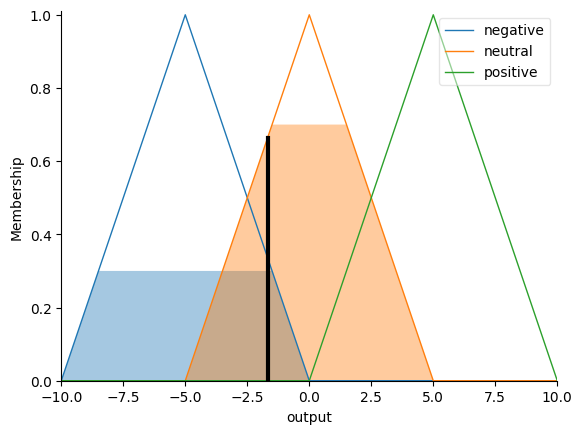

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the universe of discourse for each variable
emotion_intensity = np.arange(0, 11, 1)  # This could represent 0 to 10 scale of intensity
output_score = np.arange(-10, 11, 1)     # This could represent a score from -10 (Highly Negative) to 10 (Highly Positive)

rules_tensor = [
    'angry high or happy low then negative',
    'angry low and happy high then positive',
    'angry medium or happy medium then neutral']
antecedents = []

# Create the fuzzy variables for inputs and output
for i in range(len(moods)):
    antecedents.append(ctrl.Antecedent(emotion_intensity, moods[i]))

output = ctrl.Consequent(output_score, 'output')

# Define fuzzy sets and membership functions for each variable
for item in antecedents:
    item.automf(names=['low', 'medium', 'high'])

output['negative'] = fuzz.trimf(output_score, [-10, -5, 0])
output['neutral'] = fuzz.trimf(output_score, [-5, 0, 5])
output['positive'] = fuzz.trimf(output_score, [0, 5, 10])


# Define fuzzy rules
rules = []

# rules.append(ctrl.Rule(antecedents[0]['high'] | antecedents[4]['low'], output['negative']))
# rules.append(ctrl.Rule(antecedents[0]['low'] & antecedents[4]['high'], output['positive']))
# rules.append(ctrl.Rule(antecedents[0]['medium'] | antecedents[4]['medium'], output['neutral']))

for rule in rules_tensor:
    predicates = rule.lower().split()
    ant_predicates = antecedents[moods_indeces[predicates[0]]][predicates[1]]
    i = 2
    while i < len(predicates) - 2:
        if predicates[i] == 'or':
            ant_predicates = ant_predicates | antecedents[moods_indeces[predicates[i+1]]][predicates[i+2]]
        else:
            ant_predicates = ant_predicates & antecedents[moods_indeces[predicates[i+1]]][predicates[i+2]]
        i += 3
    rules.append(ctrl.Rule(ant_predicates, output[predicates[len(predicates) - 1]]))

# Create the control system and simulation
emotion_ctrl = ctrl.ControlSystem(rules)
emotion_sim = ctrl.ControlSystemSimulation(emotion_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
emotion_sim.input[moods[0]] = 6.5  # Let's say the person is moderately to highly angry
emotion_sim.input[moods[4]] = 3.5  # And slightly happy

# Crunch the numbers
emotion_sim.compute()

print(emotion_sim.output['output'])
output.view(sim=emotion_sim)



Create more rules, and try them on our texts:

0.41341893921257117


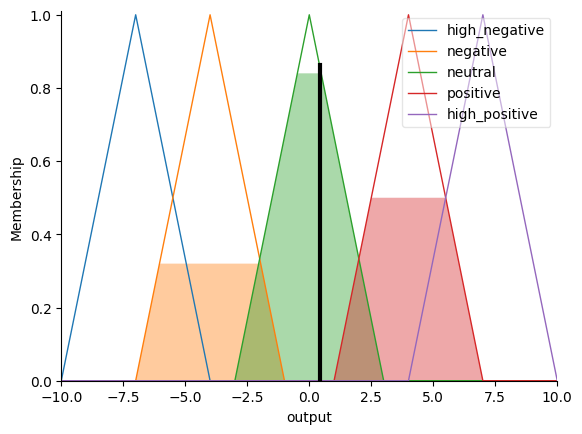

In [23]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

moods_lower = ['angry', 'worried', 'sad', 'calm', 'happy', 'excited']

# angry worried sad calm happy excited; 
# low medium high;
# or and; 
# high_negative negative neutral positive high_positive
rules_tensor = [
    'angry high or happy low then negative',
    'angry low and happy high then positive',
    'angry medium or happy medium then neutral',
    'angry high and worried high then high_negative',
    'angry medium and worried medium then negative',
    'angry low and worried low then neutral',
    'sad high and calm low then high_negative',
    'sad medium and calm medium then neutral',
    'sad low and calm high then positive',
    'happy high and excited high then high_positive',
    'happy medium and excited medium then neutral',
    'happy low and excited low then negative',
    'angry high and happy low then negative',
    'angry low and happy high then positive',
    'worried high and excited high then neutral',
    'worried low and excited low then neutral',
    'sad high and excited low then negative',
    'sad low and excited low then positive',
    'angry high and calm high then neutral',
    'angry high and calm low then high_negative',
    'angry low and calm high then high_positive',
    'worried high and happy high then neutral',
    'worried high and happy low then negative',
    'worried low and happy high then high_positive',
    'sad high and excited high then neutral',
    'sad high and excited low then negative',
    'sad low and excited high then high_positive',
    'calm high and excited high then positive',
    'calm high and excited low then positive',
    'calm low and excited high then positive',
    'angry high and sad high then high_negative',
    'angry low and sad low then neutral',
    'angry high and sad low then negative',
    'happy high and worried high then neutral',
    'happy high and worried low then high_positive',
    'happy low and worried high then negative',
    'happy high and calm high then high_positive',
    'happy medium and calm medium then positive',
    'calm medium and excited medium then positive'
    ]


# Define the universe of discourse for each variable
emotion_intensity = np.arange(0, 11, 1)  # This could represent 0 to 10 scale of intensity
output_score = np.arange(-10, 11, 1)     # This could represent a score from -10 (Highly Negative) to 10 (Highly Positive)

antecedents = []

# Create the fuzzy variables for inputs and output
for i in range(len(moods_lower)):
    antecedents.append(ctrl.Antecedent(emotion_intensity, moods_lower[i]))

output = ctrl.Consequent(output_score, 'output')

# Define fuzzy sets and membership functions for each variable
for item in antecedents:
    item.automf(names=['low', 'medium', 'high'])


output['high_negative'] = fuzz.trimf(output_score, [-10, -7, -4])
output['negative'] = fuzz.trimf(output_score, [-7, -4, -1])
output['neutral'] = fuzz.trimf(output_score, [-3, 0, 3])
output['positive'] = fuzz.trimf(output_score, [1, 4, 7])
output['high_positive'] = fuzz.trimf(output_score, [4, 7, 10])

# Define fuzzy rules
rules = []

for rule in rules_tensor:
    predicates = rule.lower().split(' ')
    ant_predicates = antecedents[moods_indeces[predicates[0]]][predicates[1]]
    i = 2
    while i < len(predicates) - 2:
        if predicates[i] == 'or':
            ant_predicates = ant_predicates | antecedents[moods_indeces[predicates[i+1]]][predicates[i+2]]
        else:
            ant_predicates = ant_predicates & antecedents[moods_indeces[predicates[i+1]]][predicates[i+2]]
        i += 3
    rules.append(ctrl.Rule(ant_predicates, output[predicates[len(predicates) - 1]]))

# Create the control system and simulation
emotion_ctrl = ctrl.ControlSystem(rules)
emotion_sim = ctrl.ControlSystemSimulation(emotion_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
for i,aggregated_mood in enumerate(aggregated_moods):
    emotion_sim.input[moods_lower[i]] = (aggregated_mood) * 10

# Crunch the numbers
emotion_sim.compute()

print(emotion_sim.output['output'])
output.view(sim=emotion_sim)


In [24]:
texts = [
    "I absolutely hate everything about this situation, and it makes me furious that such incompetence could exist in the world!",
    "This is completely unacceptable and infuriating, and I cannot believe that such a terrible outcome could happen despite all the efforts put in.",
    "I am very disappointed and frustrated with this situation, as it seems like everything that could go wrong has gone wrong, and it feels like no one cares about the consequences.",
    "I'm not happy with the outcome, as it falls far short of what was promised and expected, leaving me feeling quite let down and disillusioned.",
    "I'm somewhat satisfied with the results, as they meet the minimum expectations, but there are still several aspects that could be enhanced to achieve a truly satisfactory experience.",
    "I'm quite pleased with how things turned out overall, as most of my expectations were met, and there were some positive surprises along the way.",
    "This is very good, I'm happy with it, and I appreciate the effort that went into making this a successful outcome with only a few minor issues.",
    "I'm absolutely thrilled and overjoyed with everything, as this has exceeded all my expectations and has brought a tremendous amount of satisfaction and joy to my experience!"
]

aggregated_mood_list = []
for text in texts:
    aggregated_mood_list.append(calculate_aggregated_moods(text))

for mood in aggregated_mood_list:
    # Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
    for i,aggregated_mood in enumerate(mood):
        emotion_sim.input[moods_lower[i]] = (aggregated_mood) * 10
    # Crunch the numbers
    emotion_sim.compute()
    print(emotion_sim.output['output'])
    # output.view(sim=emotion_sim)

Word: 'hate', Moods: [0.9, 0.3, 0.3, 0, 0, 0]
Word: 'furious', Moods: [0.9, 0.3, 0.2, 0, 0, 0]
Word: 'unacceptable', Moods: [0.9, 0.6, 0.6, 0, 0, 0]
Word: 'infuriating', Moods: [0.9, 0.8, 0.6, 0, 0, 0]
Word: 'terrible', Moods: [0.9, 0.7, 0.7, 0, 0, 0]
Word: 'disappointed', Moods: [0.5, 0.3, 0.8, 0.1, 0, 0]
Word: 'frustrated', Moods: [0.8, 0.4, 0.3, 0, 0, 0]
Word: 'happy', Moods: [0.1, 0.1, 0.1, 0.7, 1, 0.6]
Word: 'satisfied', Moods: [0.1, 0.1, 0.2, 0.6, 0.5, 0.3]
Word: 'pleased', Moods: [0.1, 0.1, 0.1, 0.9, 0.8, 0.3]
Word: 'happy', Moods: [0.1, 0.1, 0.1, 0.7, 1, 0.6]
Word: 'thrilled', Moods: [0, 0, 0, 0, 0.6, 1]
Word: 'overjoyed', Moods: [0.1, 0.1, 0.1, 0.1, 1, 0.9]
-2.236328871892926
-4.6246696035242305
-2.9586216002112486
2.7698113207547173
1.7324478178368123
2.7698113207547173
2.7698113207547173
3.152406630716996


## Lets try analyze these texts using tf-idf:

In [30]:
import math
from numpy import dot
from numpy.linalg import norm

corpus = []

for i in range(6):
    vector = []
    for lex in lexicon.keys():
        if lexicon[lex][i] > 0.4:
            vector.append(lex)
    
    corpus.append(" ".join(vector))

print(corpus)

def calc_tf_idf(rows, data_to_analyse):
    words = [doc.lower().split() for doc in rows]
    # words_to_analyse = [doc.lower().split() for doc in data_to_analyse]
    vocab = set(sum(words, []))
    vocab_list = sorted(vocab)
    vocab_dict = {k:i for i,k in enumerate(vocab)}

    # term frequencies:
    X_tf = np.zeros((len(data_to_analyse), len(vocab_list)), dtype=int)
    for i,elem in enumerate(data_to_analyse):
        for word in elem.lower().split():
            if word in vocab_dict.keys():
                X_tf[i, vocab_dict[word]] += 1

    idf = np.zeros((len(vocab_list)), dtype=float)
    for i in range(len(idf)):
        count = 0
        for j in range(len(X_tf)):
            if X_tf[j, i] > 0:
                count += 1
        if count == 0:
            idf[i] = 1
        else:
            idf[i] = math.log(len(X_tf)/ count)
    
    # TFIDF
    X_tfidf = X_tf * idf

    vector_one = np.ones((len(vocab_list)), dtype=float)

    cosinuses = np.zeros((len(data_to_analyse)), dtype=float)

    for i in range(len(data_to_analyse)):
        cosinuses[i] = dot(X_tfidf[i], vector_one) / (norm(X_tfidf[i]) * norm(vector_one))
    
    return cosinuses

for corp in corpus:
    print(calc_tf_idf(corp, texts))

['frustrated disappointed furious hate unacceptable infuriating irate terrible', 'anxious unacceptable infuriating terrible nervous', 'disappointed unacceptable infuriating terrible melancholy depressed gloomy', 'peaceful serene optimistic buoyant enthusiastic upbeat festive playful vivacious jovial amused blissful grateful tranquil relaxed comfortable cozy warm inviting satisfied pleasant pleased mellow happy', 'joyful thrilled serene elated ecstatic overjoyed gleeful cheerful optimistic buoyant enthusiastic upbeat festive playful vivacious jovial amused blissful grateful tranquil relaxed comfortable cozy warm inviting satisfied pleasant pleased mellow happy', 'joyful thrilled serene elated ecstatic overjoyed gleeful cheerful optimistic buoyant enthusiastic upbeat festive playful vivacious jovial amused blissful grateful tranquil relaxed comfortable cozy warm inviting pleasant mellow happy']
[0.24253563 0.34299717 0.24253563        nan 0.24253563        nan
 0.32539569 0.24253563]
[0.

C:\Users\vmelnyk2\AppData\Local\Temp\ipykernel_15572\3179650064.py:50: RuntimeWarning: invalid value encountered in double_scalars
  cosinuses[i] = dot(X_tfidf[i], vector_one) / (norm(X_tfidf[i]) * norm(vector_one))
